In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'../code/data_utils/SampleClass/')
from Coordinates import Coordinates
sys.path.insert(1,'../code/data_utils/')
from ConfigDataset import ConfigDataset
plt.style.use('/home/gridsan/gschuette/universal/matplotlib/plot_style_2.txt')

In [2]:
base_dir = '../data/samples/origami_64_no_embed_reduction/eval_mode/corrected/'
milestone_dir = '../data/samples/origami_64_no_embed_reduction/multiple_milestones/corrected/'

In [3]:
def get_KL_div(gen_configs,tan_configs,separation,num_bins=100):

    # Collect the distances between beads separated by the specified separation
    n = gen_configs.num_beads
    s = separation
    gen_dists = gen_configs.distances.values[:,range(n-s),range(s,n)]
    tan_dists = tan_configs.distances.values[:,range(n-s),range(s,n)]

    # Choose the bins
    maxx = tan_dists.max()#max(gen_dists.max(),tan_dists.max())
    delta = maxx/num_bins
    bins = torch.arange(0,maxx+delta/2,delta)

    # Bin the data
    gen_probs = torch.histogram(gen_dists,bins,density=True).hist
    tan_probs = torch.histogram(tan_dists,bins,density=True).hist

    # Avoid NaN values
    idx = torch.where( (gen_probs!=0) & (tan_probs!=0) )[0]
    gen_probs = gen_probs[idx]
    tan_probs = tan_probs[idx]

    # Compute the KL-divergence with expectation probabilities from tan
    return (tan_probs * (tan_probs.log() - gen_probs.log())).sum()
    
    
    

In [91]:
milestones = range(5,120,5)

In [92]:
gen_dists = Coordinates(base_dir + 'unguided.pt').distances
tan_dists = Coordinates('/home/gridsan/gschuette/binz_group_shared/gkks/with_Zhuohan/conformations/Tan/unguided_equivalent.pt').distances.float()

In [93]:
KL_divs = torch.tensor([
    get_KL_div(gen_dists,tan_dists,separation) for separation in range(1,64)
]).numpy()

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 33 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'K', 'L', 'S', 'a', 'b', 'c', 'd', 'e', 'eight', 'four', 'g', 'i', 'k', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 't', 'two', 'u', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 17, 19, 20, 21, 23, 25, 27, 46, 47, 54, 68, 69, 70, 71, 72, 74, 76, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 33 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'K', 'L', 'S', 'a', 'b', 'c', 'd',

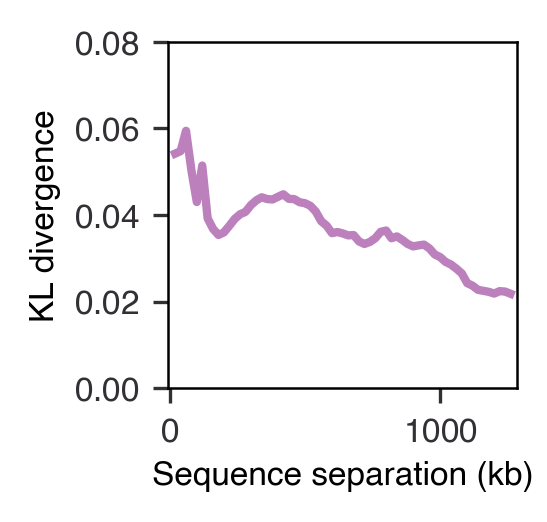

In [97]:
fig = plt.figure(figsize=(1.5,1.5))
ax = fig.add_subplot(111)

ax.plot(torch.arange(1,64)*20,KL_divs)
#ax.set_title('Agreement between scPredict and Dip-C distances')
ax.set_xlabel('Sequence separation (kb)')
ax.set_ylabel('KL divergence')
ax.set_xlim([-5,1285])

fig.savefig('./distance_statistics/KL_divergence_vs_separation.pdf',transparent=True)

In [95]:
all_averages = []
for m in milestones:
    gen_dists1 = Coordinates(milestone_dir + f'unguided_{m}.pt').distances
    all_averages.append(
        torch.tensor([
            get_KL_div(gen_dists1,tan_dists,separation) for separation in range(1,64)
        ]).median().cpu().numpy()
    )
all_averages.append(torch.from_numpy(KL_divs).median().numpy())

KeyboardInterrupt: 

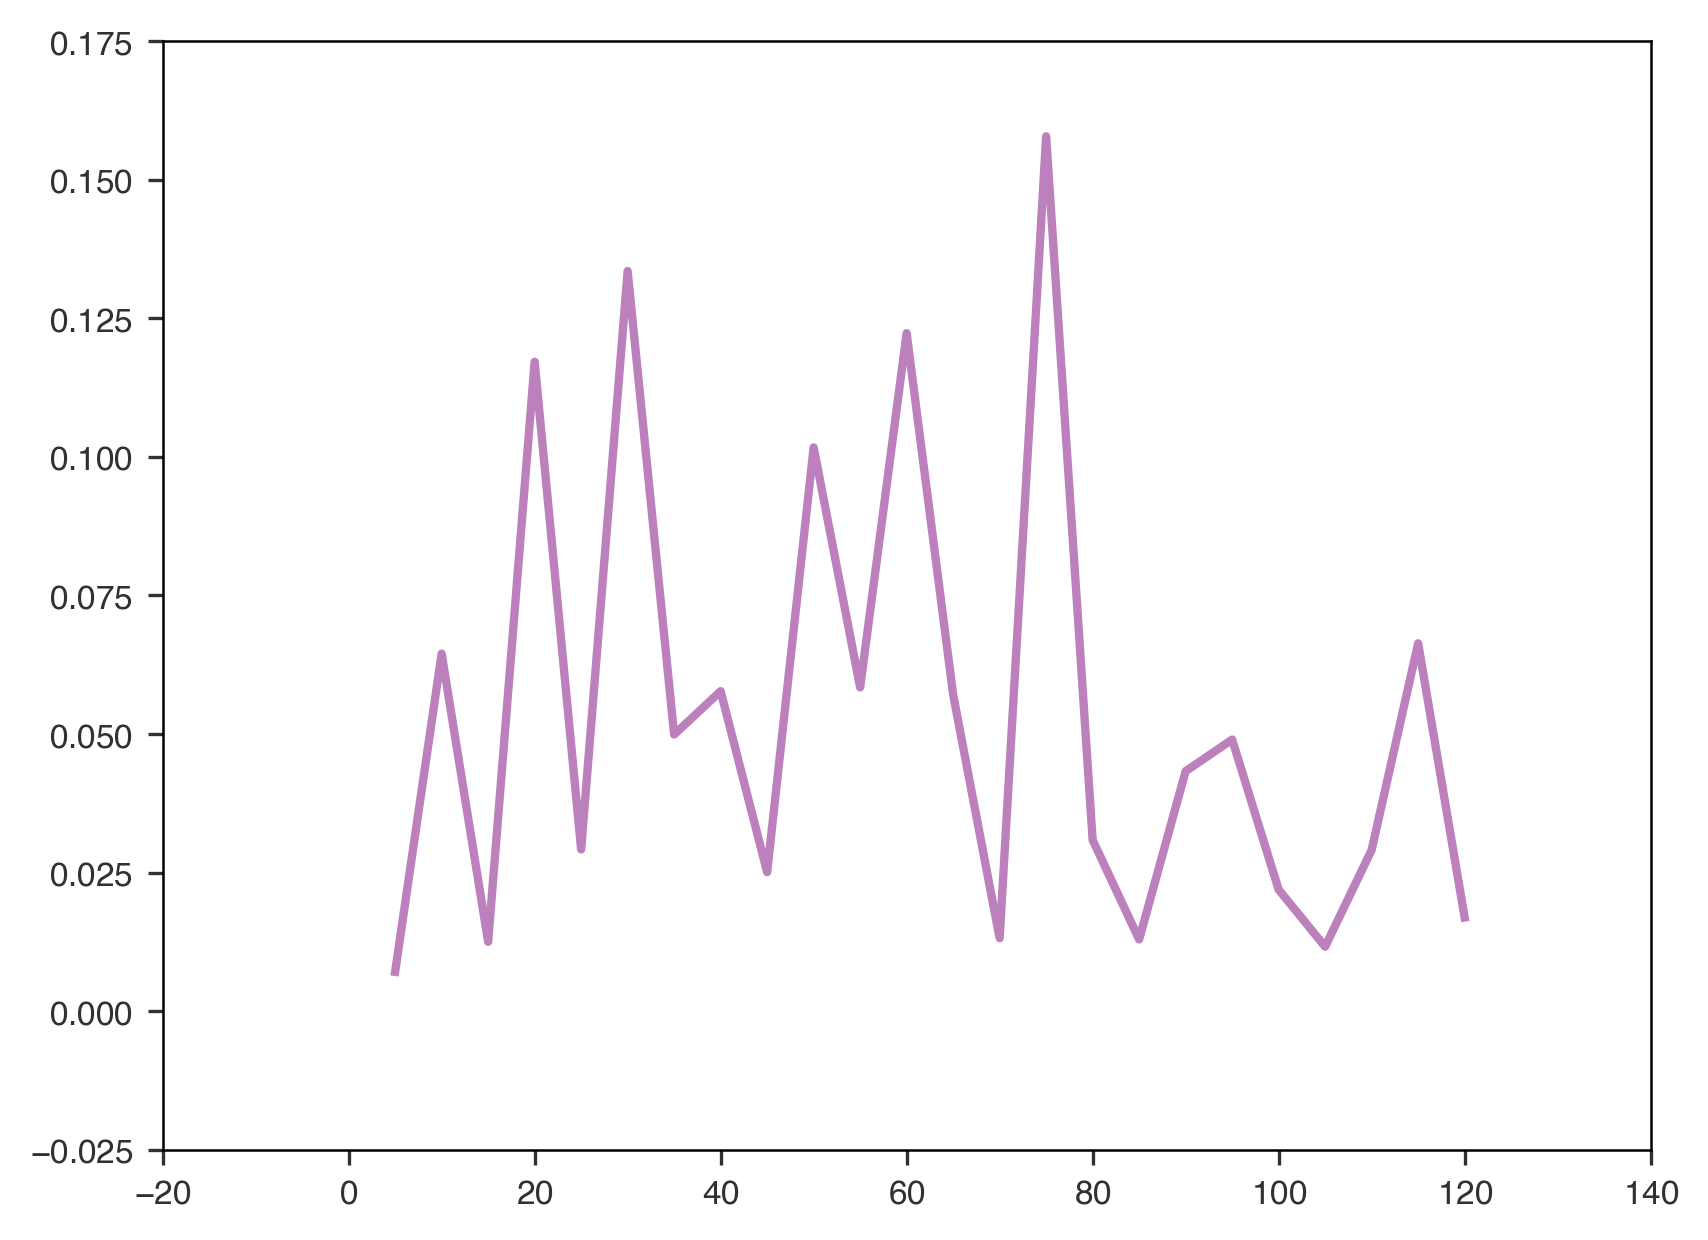

In [43]:
x = list(milestones)
x.append(120)
plt.plot(x,all_averages)

In [44]:
a=torch.tensor([get_KL_div(gen_dists1,tan_dists,separation) for separation in range(1,64)])

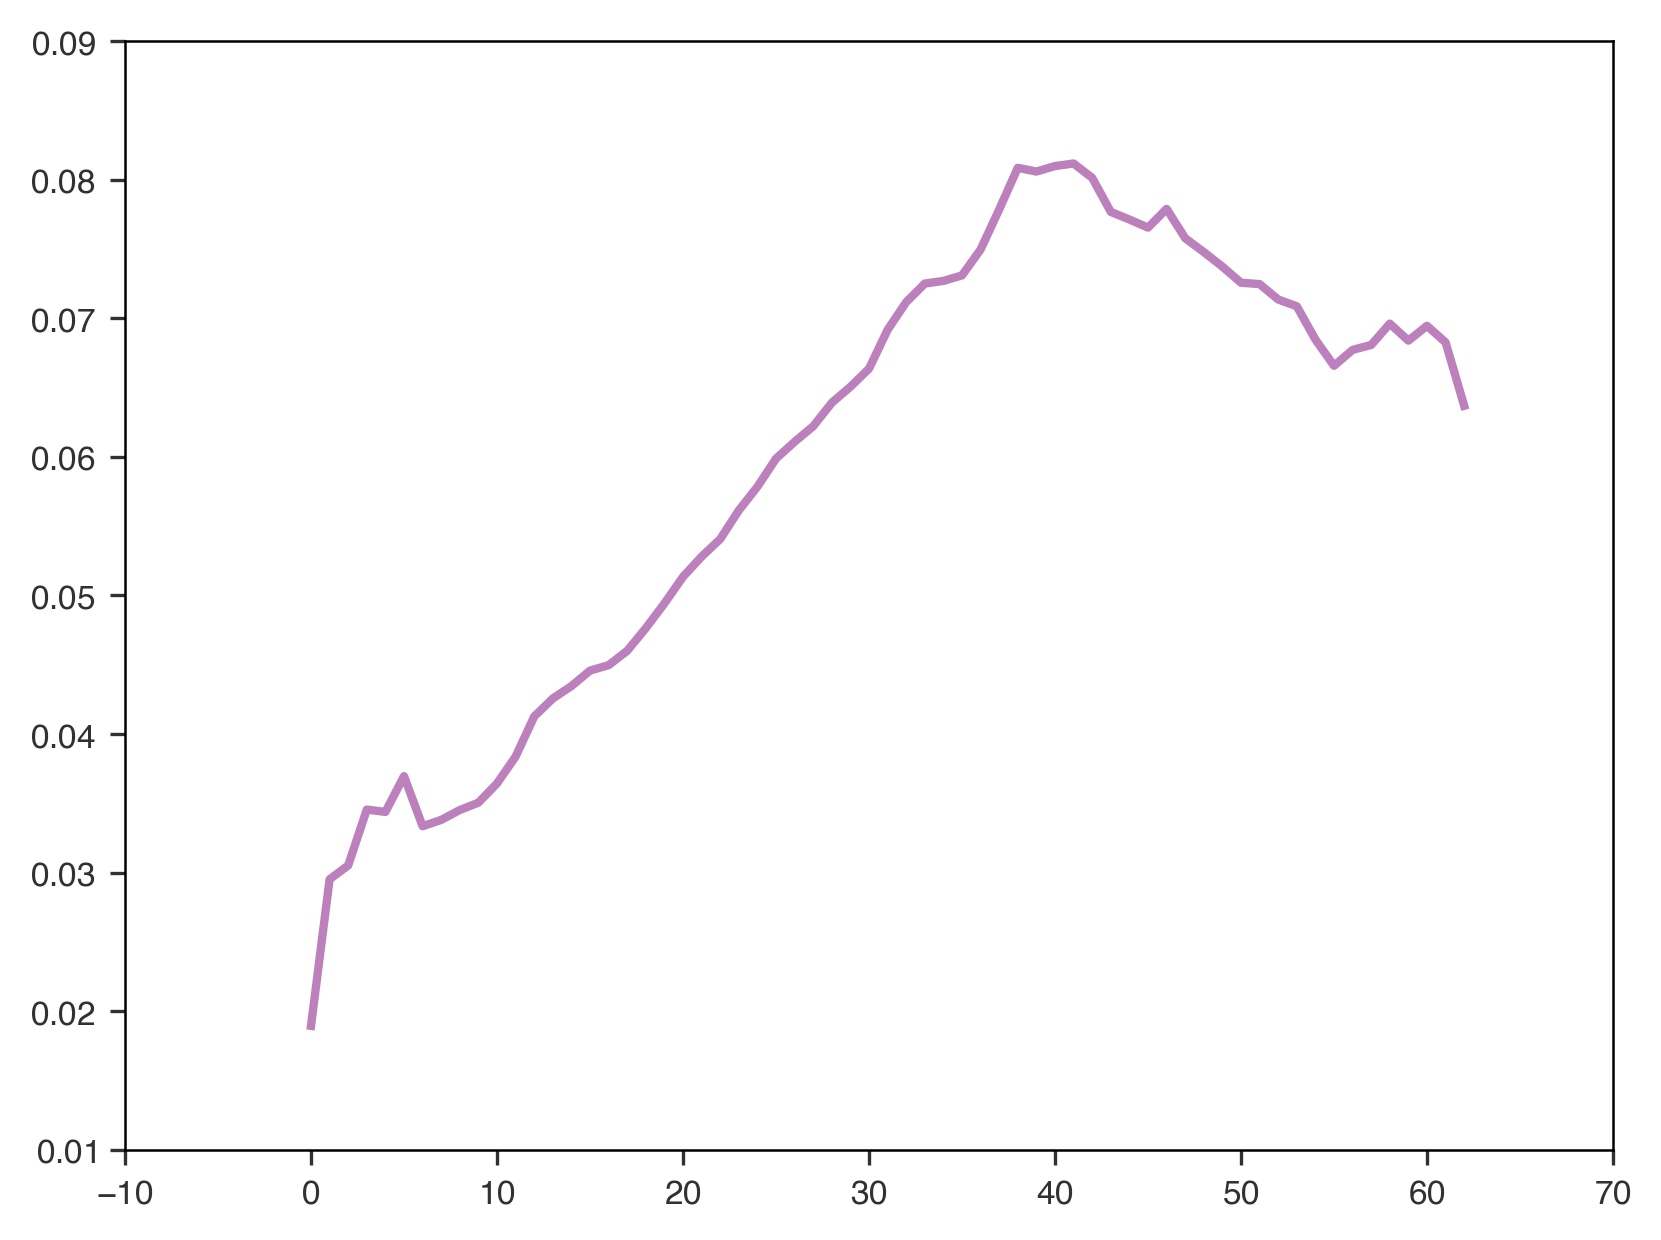

In [45]:
plt.plot(a)

Experimental region

In [49]:
base_dir = '../data/samples/origami_64_no_embed_reduction/eval_mode/'
milestone_dir = '../data/samples/origami_64_no_embed_reduction/multiple_milestones/corrected/'

In [52]:
gen_dists = Coordinates(base_dir + 'sample_395_5.0_8.0_120_1.pt').distances
tan_dists = Coordinates('/home/gridsan/gschuette/binz_group_shared/gkks/with_Zhuohan/conformations/Tan/sample_395_1.pt').distances.float()

In [54]:
KL_divs = torch.tensor([
    get_KL_div(gen_dists,tan_dists,separation) for separation in range(1,64)
]).numpy()

Text(0, 0.5, 'KL divergence')

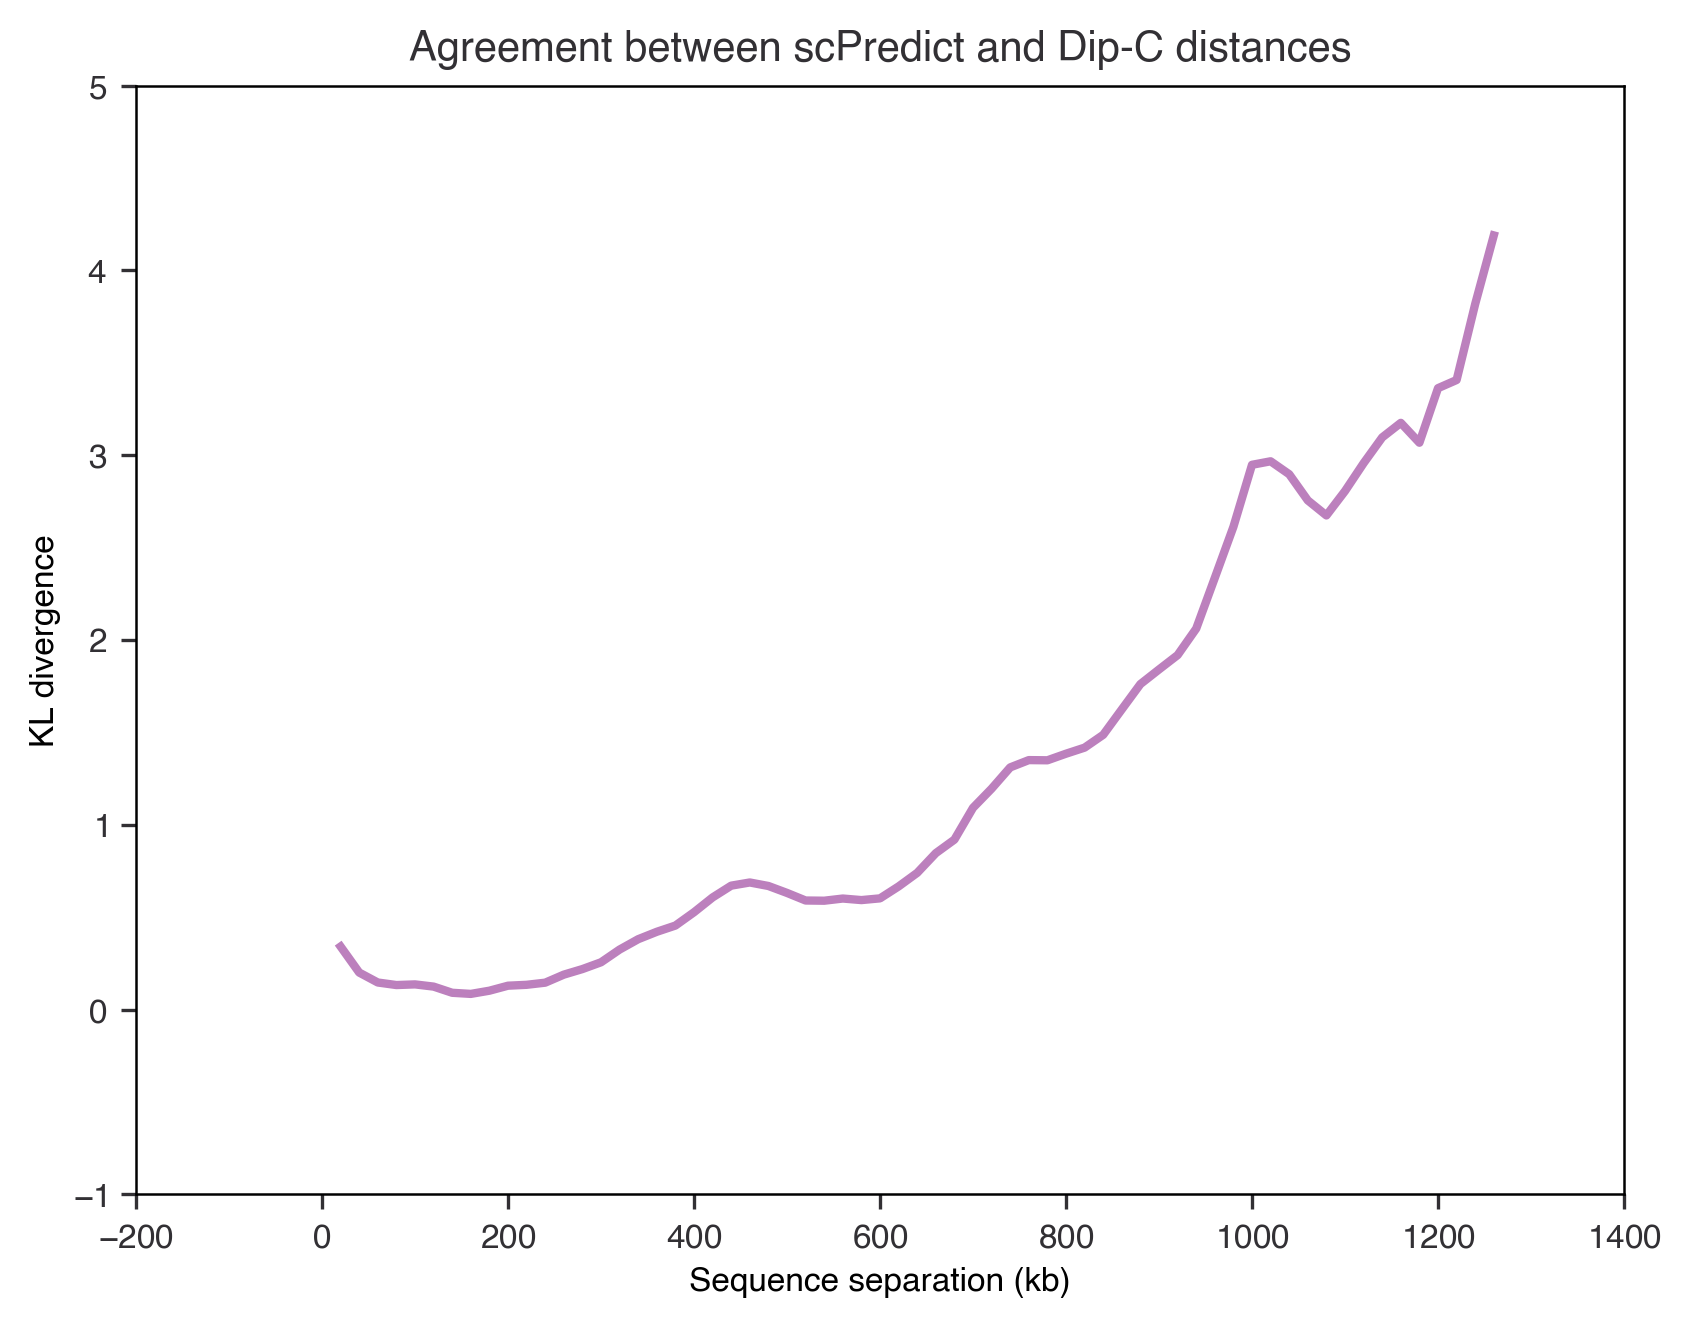

In [56]:
plt.plot(torch.arange(1,64)*20,KL_divs)
plt.title('Agreement between scPredict and Dip-C distances')
plt.xlabel('Sequence separation (kb)')
plt.ylabel('KL divergence')

In [78]:
all_averages = []
for m in milestones:
    gen_dists1 = Coordinates(milestone_dir + f'sample_395_5.0_8.0_{m}_1.pt').distances
    all_averages.append(
        torch.tensor([
            get_KL_div(gen_dists1,tan_dists,separation) for separation in range(1,64)
        ]).median().cpu().numpy()
    )
all_averages.append(torch.from_numpy(KL_divs).median().numpy())
all_averages = [x if x != 0 else np.nan for x in all_averages ]

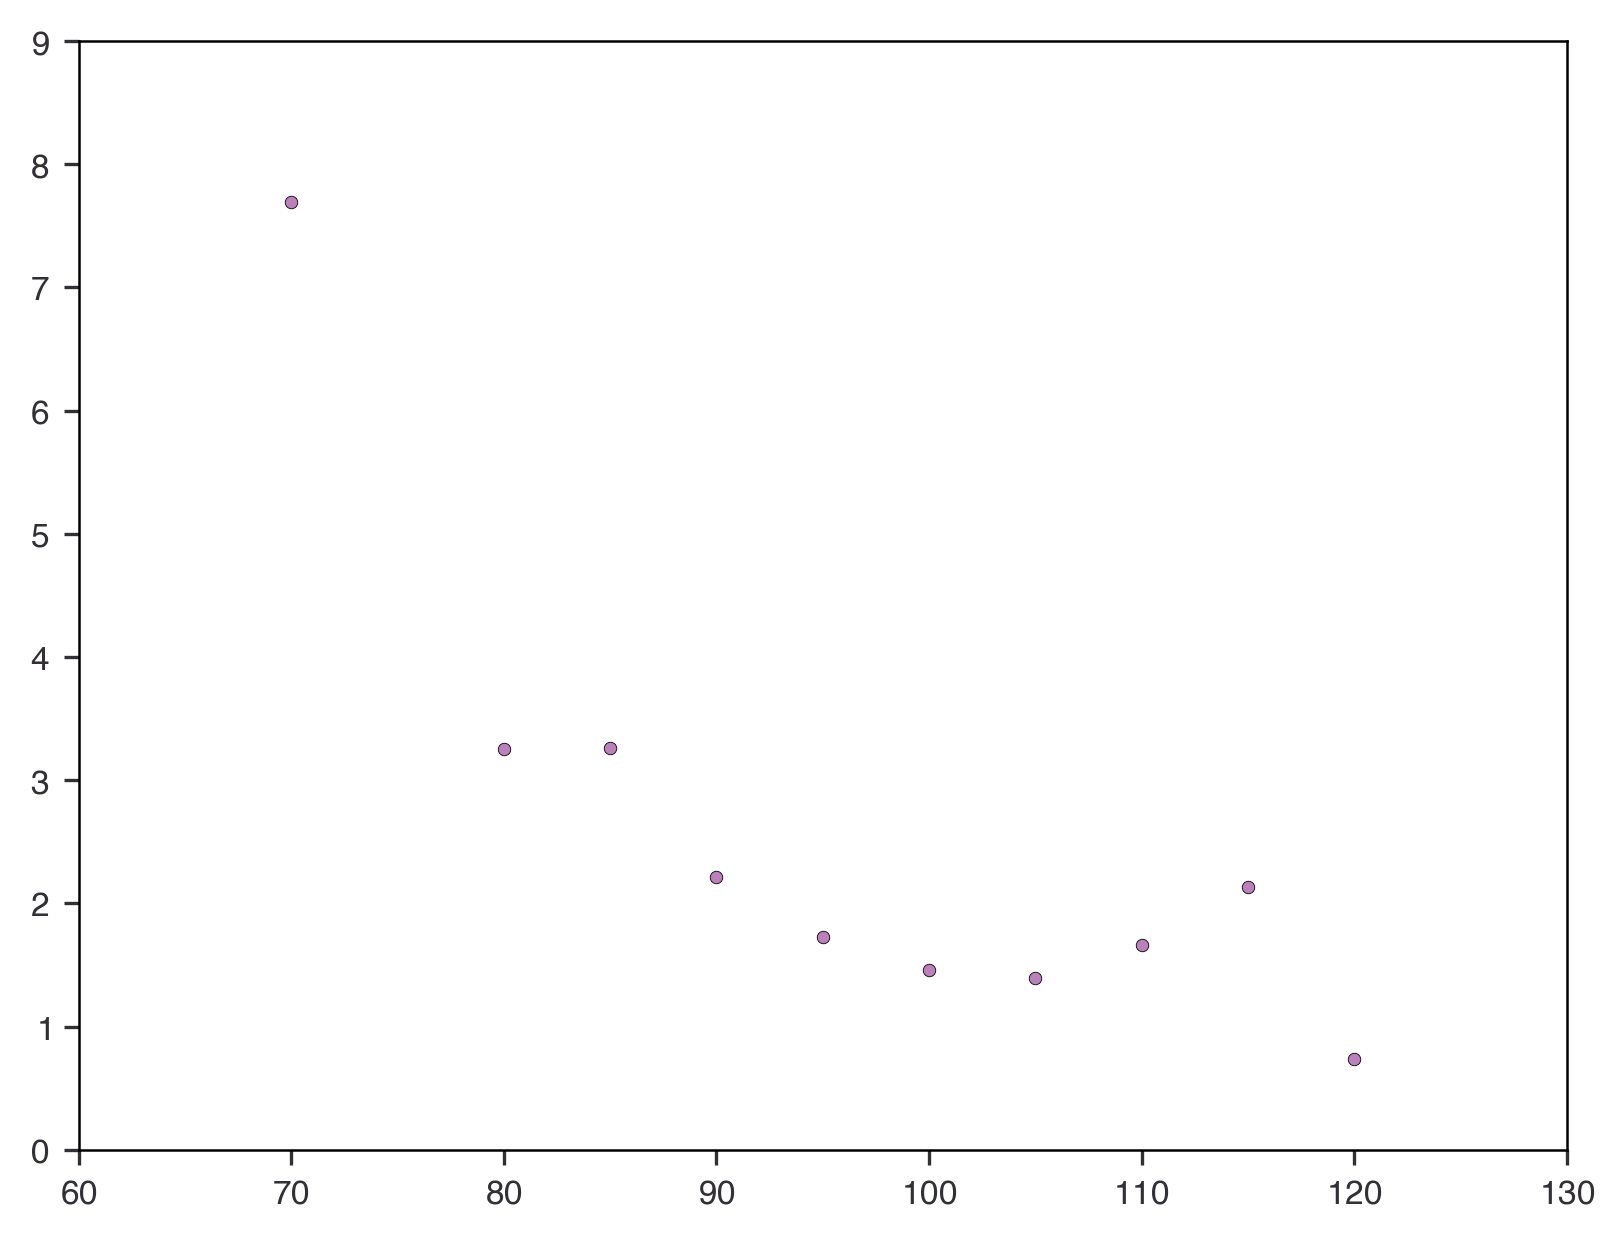

In [79]:
x = list(milestones)
x.append(120)
plt.plot(x,all_averages,'.')

In [60]:
all_averages = []
for m in [25]:
    gen_dists1 = Coordinates(milestone_dir + f'sample_395_5.0_8.0_{m}_1.pt').distances
    all_averages.append(
        torch.tensor([
            get_KL_div(gen_dists1,tan_dists,separation) for separation in range(1,64)
        ]).median().cpu().numpy()
    )
all_averages.append(torch.from_numpy(KL_divs).median().numpy())

In [63]:
gen_dists1.shape

torch.Size([1, 64, 64])

In [70]:
all_averages = [x for x in all_averages if x != 0 else np.nan]

SyntaxError: invalid syntax (2773399248.py, line 1)

In [77]:
import numpy as np
[x if x != 0 else np.nan for x in all_averages ]

[nan, array(0.73961174, dtype=float32)]

# From trying to figure out pixel shifts

In [55]:
import pandas as pd
emb_a = pd.read_pickle('../data/embeddings_64_after_transformer/chrom_22.tar.gz')

In [61]:
d = '/home/gridsan/gschuette/binz_group_shared/zlao/for_greg/after_transformation/size64/node_embedding/run_scripts_22/'
for region_idx in range(100):
    emb_b = torch.load(d+f'chr_22_{region_idx}.pt',map_location='cpu')
    assert (emb_b == emb_a.iloc[region_idx].values[0]).all()

In [63]:
rosetta = pd.read_pickle('../data/embeddings_64_after_transformer/rosetta_stone.pkl')
len(rosetta['22'])

1650

In [66]:
sys.path.insert(1,'../code/data_utils/')
from ConfigDataset import ConfigDataset

In [238]:
config_ds = ConfigDataset(
    '../data/processed_data.hdf5',
    segment_length=64,
    remove_diagonal=False,
    batch_size=0,
    normalize_distances=False,
    geos=None,
    organisms=None,
    cell_types=None,
    cell_numbers=None,
    chroms=None,
    replicates=None,
    shuffle=True,
    allow_overlap=True,
    two_channels=False,
    try_GPU=True,
    mean_dist_fp=None,
    mean_sq_dist_fp=None
)

In [68]:
config_ds.get_genomic_regions()

,Chromosome,Start,Stop
0,22,16980000,18260000
1,22,17000000,18280000
2,22,17020000,18300000
3,22,17040000,18320000
4,22,17060000,18340000
...,...,...,...
1646,22,49900000,51180000
1647,22,49920000,51200000
1648,22,49940000,51220000
1649,22,49960000,51240000


In [77]:
(config_ds.get_genomic_regions()['Start'].values[:1650] == rosetta['22'].to_frame()['Genomic_Index'].values).all()

True

In [81]:
ds_regions = config_ds.get_genomic_regions()

In [113]:
lengths_dont_match = []
for chrom in [str(k) for k in [*range(2,23),'X']]:
    from_rosetta = rosetta[chrom].to_frame()['Genomic_Index'].values
    from_ds = ds_regions[ ds_regions['Chromosome'] == chrom ]['Start'].values

    if len(from_ds) != len(from_rosetta):
        lengths_dont_match.append((chrom,len(from_ds)-len(from_rosetta)))
        from_ds = from_ds[:len(from_rosetta)]
    assert (from_rosetta==from_ds).all()

AssertionError: 

In [91]:
from EmbeddedRegions import EmbeddedRegions
er = EmbeddedRegions('../data/embeddings_64_after_transformer/',chroms='22')

In [92]:
er.index

MultiIndex([(1300000, '2',         0),
            (1300000, '2',     20000),
            (1300000, '2',     40000),
            (1300000, '2',     60000),
            (1300000, '2',     80000),
            (1300000, '2',    100000),
            (1300000, '2',    120000),
            (1300000, '2',    140000),
            (1300000, '2',    160000),
            (1300000, '2',    180000),
            ...
            (1300000, '2', 241660000),
            (1300000, '2', 241680000),
            (1300000, '2', 241700000),
            (1300000, '2', 241720000),
            (1300000, '2', 241740000),
            (1300000, '2', 241760000),
            (1300000, '2', 241780000),
            (1300000, '2', 241800000),
            (1300000, '2', 241820000),
            (1300000, '2', 241840000)],
           names=['Region_Length', 'Chromosome', 'Genomic_Index'], length=23104)

In [270]:
from DataLoader import DataLoader
dl = DataLoader(
    config_ds,
    er,
    drop_unmatched_pairs=True,
    shuffle = False,
    batch_size=128
)

In [95]:
dl.index

,coord_idx,Chromosome,Genomic_Index,embed_idx
0,"(10761, mat)",2,20000,"(1300000, 2, 20000)"
1,"(10761, mat)",2,20000,"(1300000, 2, 20000)"
2,"(136054, mat)",2,20000,"(1300000, 2, 20000)"
3,"(136054, mat)",2,20000,"(1300000, 2, 20000)"
4,"(261281, mat)",2,20000,"(1300000, 2, 20000)"
...,...,...,...,...
996059,"(4492267, pat)",2,241840000,"(1300000, 2, 241840000)"
996060,"(4629483, pat)",2,241840000,"(1300000, 2, 241840000)"
996061,"(4629483, pat)",2,241840000,"(1300000, 2, 241840000)"
996062,"(4622332, pat)",2,95300000,"(1300000, 2, 95300000)"


In [103]:
r_idx = rosetta['2']
dl_idx = dl.index['embed_idx'].drop_duplicates().reset_index(drop=True)
ds_idx = ds_regions[ ds_regions['Chromosome'] == '2' ]['Start'].values
er_idx = er.index

In [104]:
for k in [r_idx,dl_idx,ds_idx,er_idx]:
    print(len(k))

11552
11552
11555
23104


In [132]:
er_idx1 = er_idx.to_frame()['Genomic_Index'].values
a = ds_regions[ ds_regions['Chromosome'] == '2' ]
drop_rows=[]
for coord_start_idx,row in a.iterrows():
    if row.Start not in er_idx1:
        drop_rows.append(coord_start_idx)
a=a.drop(index=drop_rows)

In [161]:
dl.coord_idx.to_frame().drop_duplicates(ignore_index=True)

,coord_idx
0,"(10761, mat)"
1,"(136054, mat)"
2,"(261281, mat)"
3,"(798641, mat)"
4,"(936082, mat)"
...,...
996059,"(6275596, pat)"
996060,"(4355084, pat)"
996061,"(4492267, pat)"
996062,"(4629483, pat)"


In [164]:
config_ds.genomic_index[config_ds.start_indices]

array([    20000,     40000,     60000, ..., 241780000, 241800000,
       241820000])

In [167]:
from HiCDataset import HiCDataset
exp_hic = HiCDataset('../data/outside/GM12878_hg19.mcool')

In [181]:
a = exp_hic.fetch('1',0,1_000_000).prob_map.nan_to_num_(-1)
b = torch.from_numpy(exp_hic.clr.matrix(balance=True).fetch('1:0-1000000')).nan_to_num_(-1)

In [191]:
a = exp_hic.fetch('1',0,1_000_000).prob_map.nan_to_num_(-1)
b = exp_hic.fetch('1',0,980_001).prob_map.nan_to_num_(-1)
print(a.shape)
print(b.shape)

torch.Size([50, 50])
torch.Size([50, 50])


In [203]:
import numpy as np
def load_coords(filepath):
    '''
    Assumes Dip-C 3dg format
    '''
    coord_df = pd.read_csv(
        filepath,
        sep='\t',
        header=None,
        names=['Chromosome','Genomic_Index','x','y','z']
    )

    return coord_df

def separate_lineage(coord_df):

    # Define lineages in their own column for easy access
    coord_df['Lineage'] = [k[-4:-1] for k in coord_df['Chromosome']]

    # Reduce the chromosome column to just the chromosome number 
    # (or X/Y, where relevant)
    coord_df['Chromosome'] = [ k[:-5] for k in coord_df['Chromosome']]

    # Place lineage in the first position
    col_order = coord_df.columns.tolist()[:-1]
    col_order.insert(0,'Lineage')
    coord_df = coord_df[col_order]

    return coord_df

def sort_coord_df(coord_df):
    '''
    Want all maternal to come before all paternal bead locations. 
    Within mat/pat chromosomes, want chromosome order 1,2,...,22,X,Y. 
    Within each chromosome, want bead location to be sequential. 
    '''

    # Must make single-digit numbers equal to f'0{number}' to get the
    # desired sorting of chromosome numbers. 
    vals = {str(k):'0'+str(k) for k in range(1,10)}
    coord_df.replace({'Chromosome':vals},inplace=True)

    # Sort values with the described order of importance. 
    coord_df.sort_values(
        by=['Lineage','Chromosome','Genomic_Index'],
        axis='index',
        inplace=True,
        ignore_index=True
    )

    # Remove the leading '0's where relevant. 
    vals = {'0'+str(k):str(k) for k in range(1,10)}
    coord_df.replace({'Chromosome':vals},inplace=True)

def process_coord_data(coord_df):
    '''
    After loading data from the 3dg file, process the DataFrame
    so that it agrees with the data structure used to save 3D 
    structures in a searchable HDF5 file containing 3D data 
    from multiple organisms, cell types, chromosomes. 
    '''

    # Remove all rows with nan values in any column, as
    # we have no use for these rows. 
    coord_df.dropna(
        axis='index',
        inplace=True,
    )
    coord_df.reset_index(inplace=True,drop=True)

    # When the starting file contains NaNs or missing values, the
    # datatypes may not be what is expected. This function ensures
    # that they obey the standard construction. 
    coord_df = coord_df.astype({
        'Chromosome':str,
        'Genomic_Index':np.int64,
        'x':np.float64,
        'y':np.float64,
        'z':np.float64
    })

    # Certain data files downloaded from the GEO database contain 
    # duplicated data, so we must remove these duplicates. 
    coord_df.drop_duplicates(inplace=True,keep='first',ignore_index=True)

    # Convert Chromosome information from f"{chrom}({lineage})" to 
    # f"{chrom}" and create a new column to track the lineage. 
    coord_df = separate_lineage(coord_df)

    # Want all maternal to come before all paternal bead locations. 
    # Within mat/pat copies, want chromosome order 1,2,...,22,X,Y. 
    # Within each chromosome, want bead location to be sequential. 
    sort_coord_df(coord_df)

    return coord_df

In [235]:
coord_df = process_coord_data(load_coords('../data/tan_single-cell_2018/Supp_GSM3271347_GM12878_Cell_1/'+\
                                          'GSM3271347_gm12878_01.impute3.round4.3dg.txt.gz'))

In [205]:
coord_df

,Lineage,Chromosome,Genomic_Index,x,y,z
0,mat,1,900000,-1.894231,-10.438394,-5.413427
1,mat,1,1000000,-0.917949,-10.905042,-5.682986
2,mat,1,1100000,-0.922584,-11.819015,-6.439208
3,mat,1,1200000,0.095576,-11.478549,-6.792231
4,mat,1,1300000,0.533748,-10.662754,-6.042506
...,...,...,...,...,...,...
53910,pat,X,154900000,-21.381031,-3.935169,-15.330243
53911,pat,X,155000000,-20.653888,-4.817854,-15.487130
53912,pat,X,155100000,-19.625275,-5.036903,-15.155529
53913,pat,X,155200000,-18.891904,-4.539508,-14.587878


In [213]:
coord_df1 = load_coords('../data/tan_single-cell_2018/Supp_GSM3271347_GM12878_Cell_1/GSM3271347_gm12878_01.impute3.round4.clean.3dg.txt.gz')

In [214]:
coord_df1

,Chromosome,Genomic_Index,x,y,z
0,1(mat),1420000,0.791378,10.994729,-13.188290
1,1(mat),1440000,-0.268241,10.520088,-13.089626
2,1(mat),1460000,-1.385308,10.551379,-13.144014
3,1(mat),1480000,-1.559841,11.434083,-13.602630
4,1(mat),1500000,-0.770992,11.475849,-14.588114
...,...,...,...,...,...
253767,X(pat),155060000,18.288957,2.620728,29.666537
253768,X(pat),155080000,19.376833,3.070296,30.178674
253769,X(pat),155100000,19.704654,4.861473,28.699375
253770,X(pat),155120000,19.925560,5.837282,27.622189


In [236]:
for chrom in coord_df.Chromosome.unique():
    print(chrom,exp_hic.clr.chromsizes[chrom] - coord_df[coord_df.Chromosome==chrom].Genomic_Index.max())
    
    #print(chrom,coord_df[coord_df.Chromosome==chrom].Genomic_Index.min(),coord_df[coord_df.Chromosome==chrom].Genomic_Index.max())

1 10621
2 99373
3 122430
4 114276
5 215260
6 195067
7 18663
8 64022
9 93431
11 46516
12 11895
13 49878
14 49540
15 51392
16 55054753
17 75210
18 57248
20 45520
21 9895
22 84566
X 30560


In [ ]:
exp_hic.clr.chromsizes['1']

In [237]:
import os
base_dir = '../data/tan_single-cell_2018/'
for d in os.listdir(base_dir):
    sub_dir = base_dir + d
    for f in os.listdir(sub_dir):
        if '.clean.3dg.' not in f:
            continue

        coord_df = process_coord_data(load_coords(sub_dir + '/' + f))
        
        for chrom in coord_df.Chromosome.unique():
            t = exp_hic.clr.chromsizes[chrom] - coord_df[coord_df.Chromosome==chrom].Genomic_Index.max()
            if t < 0:
                print(d+'/'+f,chrom,t)

Supp_GSM3271348_GM12878_Cell_2/GSM3271348_gm12878_02.impute3.round4.clean.3dg.txt.gz 7 -1337
Supp_GSM3271348_GM12878_Cell_2/GSM3271348_rep2_gm12878_02.impute3.round4.clean.3dg.txt.gz 7 -1337
Supp_GSM3271348_GM12878_Cell_2/GSM3271348_rep1_gm12878_02.impute3.round4.clean.3dg.txt.gz 7 -1337
Supp_GSM3271351_GM12878_Cell_5/GSM3271351_rep1_gm12878_05.impute3.round4.clean.3dg.txt.gz 7 -1337
Supp_GSM3271351_GM12878_Cell_5/GSM3271351_gm12878_05.impute3.round4.clean.3dg.txt.gz 7 -1337
Supp_GSM3271370_GM12878_Cell_17-1/GSM3271370_rep2_gm12878_17.impute3.round4.clean.3dg.txt.gz 7 -1337
Supp_GSM3271370_GM12878_Cell_17-1/GSM3271370_gm12878_17.impute3.round4.clean.3dg.txt.gz 7 -1337
Supp_GSM3271370_GM12878_Cell_17-1/GSM3271370_rep1_gm12878_17.impute3.round4.clean.3dg.txt.gz 7 -1337
Supp_GSM3271364_GM12878_Cell_14-1/GSM3271364_rep2_gm12878_14.impute3.round4.clean.3dg.txt.gz 7 -1337
Supp_GSM3271364_GM12878_Cell_14-1/GSM3271364_rep1_gm12878_14.impute3.round4.clean.3dg.txt.gz 7 -1337
Supp_GSM3271364_GM12

In [246]:
dl.index[0,0]

,coord_idx,Chromosome,Genomic_Index,embed_idx
0,"(10761, mat)",2,20000,"(1300000, 2, 20000)"
1,"(10761, mat)",2,20000,"(1300000, 2, 20000)"
2,"(136054, mat)",2,20000,"(1300000, 2, 20000)"
3,"(136054, mat)",2,20000,"(1300000, 2, 20000)"
4,"(261281, mat)",2,20000,"(1300000, 2, 20000)"
...,...,...,...,...
996059,"(4492267, pat)",2,241840000,"(1300000, 2, 241840000)"
996060,"(4629483, pat)",2,241840000,"(1300000, 2, 241840000)"
996061,"(4629483, pat)",2,241840000,"(1300000, 2, 241840000)"
996062,"(4622332, pat)",2,95300000,"(1300000, 2, 95300000)"


In [248]:
config_ds.coord_info

,Accession,Organism,Cell_Type,Cell,Replicate,Chromosome,idx_min,idx_max
0,GSE117876,Human,GM12878,1,0,1,0,10760
1,GSE117876,Human,GM12878,1,0,2,10761,22431
2,GSE117876,Human,GM12878,1,0,3,22432,32136
3,GSE117876,Human,GM12878,1,0,4,32137,41468
4,GSE117876,Human,GM12878,1,0,5,41469,50199
...,...,...,...,...,...,...,...,...
1078,GSE117876,Human,GM12878,17,2,19,6374782,6377457
1079,GSE117876,Human,GM12878,17,2,20,6377458,6380412
1080,GSE117876,Human,GM12878,17,2,21,6380413,6382032
1081,GSE117876,Human,GM12878,17,2,22,6382033,6383714


In [253]:
coord1 = pd.read_hdf(
    '../data/processed_data.hdf5',
    key='Coordinates',
    start=0,
    stop=6390350+1
)

In [271]:
a = next(dl)

In [272]:
a[0].shape,a[1].shape

(torch.Size([128, 1, 64, 64]), torch.Size([256, 1, 256, 256]))

In [285]:
b=er.fetch(dl.embed_idx[:10])

In [286]:
(b[:10]==b[10:]).all()

tensor(True)

In [305]:
b = er.data.loc[dl.embed_idx[0:1001:1000],'Data'].values
(b[0]==b[1]).all()

tensor(True)

In [303]:
er.data.loc[dl.embed_idx[0:1001:1000],'Data'].values

array([tensor([[[-1.8358, -0.9914,  0.7633,  ...,  2.7724, -1.4792, -2.4673],
                [-1.6285, -1.2232,  0.6600,  ...,  2.5298, -0.6520, -2.3792],
                [-2.1083,  0.5417,  0.8086,  ...,  1.1168,  1.3752, -0.0970],
                ...,
                [-1.6707,  0.9521, -1.2097,  ...,  0.2720,  1.1169, -1.3510],
                [-1.6050,  2.7897,  0.3768,  ...,  2.6695, -0.3220, -4.6413],
                [-1.5799,  2.3223,  1.2603,  ...,  1.5864, -0.8544, -5.0125]]]),
       tensor([[[-1.8358, -0.9914,  0.7633,  ...,  2.7724, -1.4792, -2.4673],
                [-1.6285, -1.2232,  0.6600,  ...,  2.5298, -0.6520, -2.3792],
                [-2.1083,  0.5417,  0.8086,  ...,  1.1168,  1.3752, -0.0970],
                ...,
                [-1.6707,  0.9521, -1.2097,  ...,  0.2720,  1.1169, -1.3510],
                [-1.6050,  2.7897,  0.3768,  ...,  2.6695, -0.3220, -4.6413],
                [-1.5799,  2.3223,  1.2603,  ...,  1.5864, -0.8544, -5.0125]]]),
       tensor([[

In [307]:
dl.embedded_regions.fetch(dl.embed_idx[0:1001:1000])

tensor([[[[-1.8358, -0.9914,  0.7633,  ...,  2.7724, -1.4792, -2.4673],
          [-1.6285, -1.2232,  0.6600,  ...,  2.5298, -0.6520, -2.3792],
          [-2.1083,  0.5417,  0.8086,  ...,  1.1168,  1.3752, -0.0970],
          ...,
          [-1.6707,  0.9521, -1.2097,  ...,  0.2720,  1.1169, -1.3510],
          [-1.6050,  2.7897,  0.3768,  ...,  2.6695, -0.3220, -4.6413],
          [-1.5799,  2.3223,  1.2603,  ...,  1.5864, -0.8544, -5.0125]]],


        [[[-1.8358, -0.9914,  0.7633,  ...,  2.7724, -1.4792, -2.4673],
          [-1.6285, -1.2232,  0.6600,  ...,  2.5298, -0.6520, -2.3792],
          [-2.1083,  0.5417,  0.8086,  ...,  1.1168,  1.3752, -0.0970],
          ...,
          [-1.6707,  0.9521, -1.2097,  ...,  0.2720,  1.1169, -1.3510],
          [-1.6050,  2.7897,  0.3768,  ...,  2.6695, -0.3220, -4.6413],
          [-1.5799,  2.3223,  1.2603,  ...,  1.5864, -0.8544, -5.0125]]],


        [[[-1.6734,  0.4773, -0.4615,  ...,  2.2154, -3.9579, -1.6704],
          [-2.2028,  0.790

In [309]:
torch.nn.functional.mse_loss(torch.rand(64,1,64,64) , torch.rand(128,1,64,64))

/state/partition1/slurm_tmp/25767188.0.0/ipykernel_534671/2564464451.py:1: UserWarning: Using a target size (torch.Size([128, 1, 64, 64])) that is different to the input size (torch.Size([64, 1, 64, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(torch.rand(64,1,64,64) , torch.rand(128,1,64,64))


RuntimeError: The size of tensor a (64) must match the size of tensor b (128) at non-singleton dimension 0